<a href="https://colab.research.google.com/github/jjyjung/algorithm/blob/gh-pages/ch9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 9. 그래프 알고리즘

## 9.3. 그래프 탐색(Graph Traversal) - BSF & DFS

In [44]:
mygraph = { "A" : {"B","C", "D"},
            "B" : {"A", "D"},
            "C" : {"A", "D", "F", "G"},
            "D" : {"A", "B", "C", "E"},
            "E" : {"D"},
            "F" : {"C", "G", "H"},
            "G" : {"C", "F", "H"},
            "H" : {"F", "G"}
          }

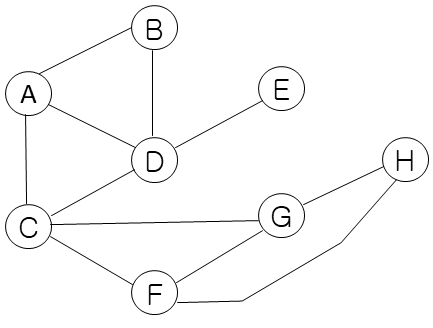

**[9-1] BFS (Breath-First Search) 알고리즘**

In [47]:
import queue
def bfs(G, s):
    visited = {s}              	  # 맨 처음에는 start만 방문한 정점임
    Q = queue.Queue()             # 파이썬 큐 모듈의 큐 객체 생성
    Q.put(s)
    while not Q.empty():          # 큐에 항목이 있는 동안
        u = Q.get()               # 큐에서 하나의 정점 u를 빼냄
        print(u, end=' ')         # u는 방문했음을 출력
        L = G[u] - visited        # L = {u의 인접정점} - {방문정점}
        for v in L:               # 갈 수 있는 모든 인접 정점에 대해
            visited.add(v)        # 이제 u는 방문했음
            Q.put(v)              # u를 큐에 삽입

print('BFS : ', end='')
bfs(mygraph, "A")
print()

BFS : A C D B F G E H 


**[9-2] DFS (Depth-First Search) 알고리즘**

In [ ]:
def dfs(G, v, visited):			  # 깊이우선탐색 알고리즘
    if v not in visited :			# start가 방문하지 않은 정점이면
        visited.add(v)				# start를 방문한 노드 집합에 추가
        print(v, end=' ')			# start를 방문했다고 출력함
        L = G[v] - visited		# nbr: 차집합 연산 이용
        for x in L:						# v ∈ {인접정점} - {방문정점}
            dfs(G, x, visited) # v에 대해 dfs를 순환적으로 호출

print("DFS : ", end="")
dfs(mygraph, "A", set() )
print()

DFS : A C F H G D E B 


## 9.4. 최소신장트리 (Minimum Spanning Tree)


**프림(Prim) 알고리즘**

In [ ]:
INF = 9999
def getMinVertex(dist, selected) :
    minv = -1	
    mindist = INF
    for v in range(len(dist)) :					# 모든 정점들에 대해
        if not selected[v] and dist[v]<mindist :	# 선택 안 되었고  
            mindist = dist[v]						# 가중치가 작으면
            minv = v								# minv 갱신
    return minv					# 최소 가중치의 정점 반환


def Prim(vertex, adj) :
    vsize = len(vertex)
    dist = [INF] * vsize
    dist[0] = 0					# dist: [0, INF, ... INF]
    selected = [False] * vsize	# selected: [False, False, ... False]

    for i in range(vsize) :		# 정점의 수 만큼 반복
        u = getMinVertex(dist, selected)
        selected[u] = True		# u는 이제 선택됨
        print(vertex[u], end=':')	# u를 출력
        print(dist)				# dist 를 출력

        for v in range(vsize) :	# 내부 루프
            if (adj[u][v] != None):	# (u,v) 간선이 있으면 dist[v] 갱신
                if selected[v]==False and adj[u][v]< dist[v] :
                    dist[v] = adj[u][v]



vertex =   [  'A', 'B', 'C', 'D', 'E', 'F', 'G' ]
weight = [ [ None,  29,None,None,None,  10,None ],
           [   29,None,  16,None,None,None,  15 ],
           [ None,  16,None,  12,None,None,None ],
           [ None,None,  12,None,  22,None,  18 ],
           [ None,None,None,  22,None,  27,  25 ],
           [   10,None,None,None,  27,None,None ],
           [ None,  15,None,  18,  25,None,None ]]
print("MST By Prim's Algorithm")
Prim(vertex, weight)

MST By Prim's Algorithm
A:[0, 9999, 9999, 9999, 9999, 9999, 9999]
F:[0, 29, 9999, 9999, 9999, 10, 9999]
E:[0, 29, 9999, 9999, 27, 10, 9999]
D:[0, 29, 9999, 22, 27, 10, 25]
C:[0, 29, 12, 22, 27, 10, 18]
B:[0, 16, 12, 22, 27, 10, 18]
G:[0, 16, 12, 22, 27, 10, 15]


## 9.5. 위상정렬 (Topological Ordering)

**[알고리즘 9-6] 위상정렬 알고리즘1**





In [ ]:
def topological_sort1(E):  
  # 진입간선 Edge dictionary 구축
  IN = {}   # dictionary 초기화
  for i in E.keys():   # 진입간선 개수를 0으로 모두 초기화
    IN[i] = 0
  for v in E:
    for u in E[v]:    # 진입간선의 개수를 Graph에서 count함
      IN[u] += 1
  print(IN)

  A = []      # 위상정렬을 출력할 목록
  for k in range(len(V)):  # 한 번에 하나씩 A에 입력한다.
    for u in E:            # 모든 노드 중에서..
      if IN[u] == 0:       # 진입간선이 없으면 (진입간선 개수=0)
        A.append(u)        # u를 A에 추가합니다.
        for v in E[u]:     # 노드 u의 모든 도착노드를 찾아서..
          IN[v] -= 1       # 그 도착노드에서 진입간선 개수를 -1 합니다.
        E.pop(u)           # 노드 i를 E에서 삭제하고..
        break              # for i in N을 유지시키기 위하여, 한 번에 한 노드씩만 A에 추가합니다.
  return A

def printV(A, V):
  for a in A:
    print(V[a])  # 노드 Label을 출력함

# Graph 구조 저장하기
V = {0:"냄비에 물붓기", 1:"점화", 2:"라면 넣기", 3:"계란 풀어넣기", 4:"라면봉지 뜯기", 5:"스프 넣기"}
E = {0:{1}, 2:{3}, 3:{}, 4:{2,5}, 5:{3}}  # 진출간선

A = topological_sort1(E)
printV(A, V)


{0: 0, 1: 1, 2: 2, 3: 3, 4: 0, 5: 2}
냄비에 물붓기
점화
라면봉지 뜯기
라면 넣기
스프 넣기
계란 풀어넣기


## 9.6. 최단경로 (Shortest Path)

**[9-10] 플로이드-워샬(Floyd-Warshall) 알고리즘**

In [52]:
def FloydWarshall(D):	# Floyd의 최단경로탐색 함수. 
    n = len(D)       		# 정점의 개수

    for k in range(n) :			# 정점 k를 추가할 때
        for i in range(n) :
            for j in range(n) :	# 모든 D[i][j] 갱신
                if (D[i][k] + D[k][j] < D[i][j]) :
                    D[i][j] = D[i][k] + D[k][j]
        printD(D)					# 현재 D 행렬 출력 


def printD(D):	# 현재의 최단거리 행렬 D를 화면에 출력하는 함수
    vsize = len(D)
    print("====================================")
    for i in range(vsize) :
        for j in range(vsize) :
            if (D[i][j] == INF) : print(" INF ", end='')
            else : print("%4d "%D[i][j], end='')
        print("")


INF = 9999
V = [  'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H' ]
E = [ [    0,   8,  11,   9, INF, INF, INF, INF ],
      [  INF,   0, INF, INF,  10, INF, INF, INF ],
      [  INF, INF,   0, INF, INF,   8,   8, INF ],
      [  INF, -15,   3,   0,   1, INF, INF, INF ],
      [  INF, INF, INF, INF,   0, INF, INF,   2 ],
      [  INF, INF, INF, INF, INF,   0,  -7, INF ],
      [  INF, INF, INF,  12, INF, INF,   0,   5 ],
      [  INF, INF, INF, INF, INF,   4, INF,   0 ]]
print("Floyd-Warshall's Algorithm")
FloydWarshall(E)


Floyd-Warshall's Algorithm
   0    8   11    9  INF  INF  INF  INF 
 INF    0  INF  INF   10  INF  INF  INF 
 INF  INF    0  INF  INF    8    8  INF 
 INF  -15    3    0    1  INF  INF  INF 
 INF  INF  INF  INF    0  INF  INF    2 
 INF  INF  INF  INF  INF    0   -7  INF 
 INF  INF  INF   12  INF  INF    0    5 
 INF  INF  INF  INF  INF    4  INF    0 
   0    8   11    9   18  INF  INF  INF 
 INF    0  INF  INF   10  INF  INF  INF 
 INF  INF    0  INF  INF    8    8  INF 
9984  -15    3    0   -5 9984 9984 9984 
 INF  INF  INF  INF    0  INF  INF    2 
 INF  INF  INF  INF  INF    0   -7  INF 
 INF  INF  INF   12  INF  INF    0    5 
 INF  INF  INF  INF  INF    4  INF    0 
   0    8   11    9   18   19   19  INF 
 INF    0  INF  INF   10  INF  INF  INF 
 INF  INF    0  INF  INF    8    8  INF 
9984  -15    3    0   -5   11   11 9984 
 INF  INF  INF  INF    0  INF  INF    2 
 INF  INF  INF  INF  INF    0   -7  INF 
 INF  INF  INF   12  INF  INF    0    5 
 INF  INF  INF  INF  INF    4 

In [49]:
E

[[0, -6, 11, 9, 4, 10, 3, 6],
 [9999, 0, 24, 21, 10, 16, 9, 12],
 [9997, -2, 0, 13, 8, 8, 1, 6],
 [9984, -15, 3, 0, -5, 1, -6, -3],
 [9995, -4, 14, 11, 0, 6, -1, 2],
 [9989, -10, 8, 5, 0, 0, -7, -2],
 [9996, -3, 15, 12, 7, 9, 0, 5],
 [9993, -6, 12, 9, 4, 4, -3, 0]]